<a href="https://colab.research.google.com/github/higgsboson1209/CS50-staff/blob/master/SLfeedback.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
data=pd.read_csv("/content/drive/My Drive/Weekly Feedback and Check-In (Responses) - Form Responses 1.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(data.head())

           Timestamp  ...             Anything else you want to let us know?
0  6/30/2020 2:08:00  ...                                                NaN
1   7/1/2020 7:46:26  ...  Maybe create on discod private sub sections fo...
2   7/1/2020 7:47:52  ...                                                NaN
3   7/1/2020 7:47:54  ...  I would like to change the section time to UTC...
4   7/1/2020 7:48:40  ...                                                NaN

[5 rows x 27 columns]


In [ ]:
###drop all columns that are useless
data.drop(['Timestamp','Check all resources that you found helpful'],axis=1,inplace=True)

In [ ]:
###drop data enteries made by SL's
data.drop(data[data['Are you a student or a section leader?']!='Student'].index,inplace=True)

In [ ]:
###drop data enteries not relevant to the students by index
data.drop(data.iloc[:,10:24],inplace=True,axis=1)

In [ ]:
data.head()

,Email Address,Are you a student or a section leader?,Did you attend Section this week?,Feel free to elaborate on your response(s) above,I feel comfortable reaching out for help.,Feel free to elaborate on your rating above,How helpful did you find your section?,Pace,Difficulty,What other feedback would you like to provide about your section?,Anything else you want to let us know?
0,bhaskar.bharat92@gmail.com,Student,"No - I signed up for a section, but wasn't abl...",Harvard's CS50x lectures are well laid out. It...,4.0,NaN,NaN,NaN,NaN,NaN,NaN
1,g_fahd@hotmail.com,Student,Yes,NaN,5.0,NaN,5.0,5.0,1.0,NaN,Maybe create on discod private sub sections fo...
2,pramodrao24@gmail.com,Student,Yes,NaN,5.0,NaN,5.0,3.0,1.0,NaN,NaN
3,emily.okuhara@gmail.com,Student,Yes,NaN,4.0,NaN,2.0,1.0,1.0,NaN,I would like to change the section time to UTC...
4,negar.hadian@gmail.com,Student,Yes,NaN,5.0,NaN,4.0,4.0,3.0,NaN,NaN


In [ ]:
###drop are you a student or SL since we only now have data for the students
data.drop(data.columns[1],axis=1,inplace=True)

In [ ]:
###drop data enteries of students who didnt attend sections
data.drop(data[data['Did you attend Section this week?']!='Yes'].index,inplace=True)

In [ ]:
data.drop(data.columns[1],axis=1,inplace=True)

In [ ]:
for i,j in enumerate(data.columns):
  print(i,j)

0 Email Address
1 Feel free to elaborate on your response(s) above
2 I feel comfortable reaching out for help.
3 Feel free to elaborate on your rating above
4 How helpful did you find your section?
5 Pace
6 Difficulty
7 What other feedback would you like to provide about your section?
8 Anything else you want to let us know?


In [ ]:
SLmap=pd.read_csv("/content/drive/My Drive/consolidated student enrollment - Final Version.csv")

In [ ]:
###drop data enteries not relevant to the students by index
SLmap.drop(SLmap.columns[[0,1,3,4,5,6]],inplace=True,axis=1)

In [ ]:
###remove unnecesary columns
SLmap.drop(SLmap.iloc[:,2:],inplace=True,axis=1)

In [ ]:
SLmap.head(100)

,Email Address,Email Address.1
0,chrishingley17@gmail.com,michael.pon@gmail.com
1,colefortner@gmail.com,NaN
2,jung.st1995@gmail.com,NaN
3,citrayuwono@yahoo.com,NaN
4,gulsariyar@gmail.com,NaN
...,...,...
95,hasanhamid_1997@yahoo.com,toby.wang.96@gmail.com
96,amusatdaniel2029@gmail.com,NaN
97,spidersilk2@gmail.com,NaN
98,khepera.damu@gmail.com,NaN


In [ ]:
###converting Nan Values to zero since they are not useful here 
SLmap.fillna(0,inplace=True)

In [ ]:
###take care of 0 values since rows with NAN values make it 
for ind in SLmap.index:
  if SLmap['Email Address.1'][ind]!=0 and SLmap['Email Address.1'][ind]!="notes : team teaching":
    temp=SLmap['Email Address.1'][ind]
  else:
    SLmap['Email Address.1'][ind]=temp

In [ ]:
###merge the 2 dataframes based on the Data df and keep the right side df as SLmap
fin=pd.merge(data,SLmap,how="left",on="Email Address")

In [ ]:
###weird thing with SL email where data is filled with notes:team teaching 
fin.head(50)

,Email Address,Feel free to elaborate on your response(s) above,I feel comfortable reaching out for help.,Feel free to elaborate on your rating above,How helpful did you find your section?,Pace,Difficulty,What other feedback would you like to provide about your section?,Anything else you want to let us know?,Email Address.1
0,g_fahd@hotmail.com,NaN,5.0,NaN,5.0,5.0,1.0,NaN,Maybe create on discod private sub sections fo...,NaN
1,pramodrao24@gmail.com,NaN,5.0,NaN,5.0,3.0,1.0,NaN,NaN,akshayn@cmi.ac.in
2,emily.okuhara@gmail.com,NaN,4.0,NaN,2.0,1.0,1.0,NaN,I would like to change the section time to UTC...,siddhanttiwary30@gmail.com
3,negar.hadian@gmail.com,NaN,5.0,NaN,4.0,4.0,3.0,NaN,NaN,akshayn@cmi.ac.in
4,shalini.916@gmail.com,Like this holistic approach of learning with c...,5.0,Everyone is very welcoming so i am comfortable...,5.0,3.0,2.0,"If an agenda is shared before each section, th...",No,akshayn@cmi.ac.in
5,jessejeremiah2015@gmail.com,NaN,3.0,NaN,5.0,3.0,3.0,NaN,NaN,huismichael9@gmail.com
6,NAIR.PRASANA@GMAIL.COM,NaN,4.0,I am quite shy about this but the section lead...,4.0,4.0,2.0,would be great if we kind of go through what t...,"Thank you for doing all this, to the teachers ...",akshayn@cmi.ac.in
7,yum.julia@gmail.com,Haven't had a chance to check office hours and...,5.0,NaN,3.0,5.0,1.0,It is great to have a short recap and practice...,"thanks for making this happen, it is awesome t...",akshayn@cmi.ac.in
8,narmin.isparzade@gmail.com,NaN,5.0,NaN,4.0,4.0,3.0,NaN,NaN,reenayuan@berkeley.edu
9,malphonsus20@gmail.com,NaN,4.0,NaN,5.0,3.0,3.0,NaN,A copy of the section problems being solved wo...,vedang.d.gaonkar@gmail.com


In [ ]:
###dictionary with combined SL's
diction={"akshayn@cmi.ac.in":"Akshay and Siddhant","vedang.d.gaonkar@gmail.com":"Vedang and Prabhsimar","siddhanttiwary30@gmail.com":"Akshay and Siddhant","yarmakx@gmail.com":"Yaroslav and Jing","limjingrong@gmail.com":"Yaroslav and Jing","yarmakx@gmail.com":"Yaroslav and Jing","sak0615@gmail.com":"Rajdeep and Saksham","rajthebest@gmail.com":"Rajdeep and Saksham","huismichael9@gmail.com":"Michael and Nihal","riemannzeta5@gmail.com":"Michael and Nihal" }

In [ ]:
###getting the team names together for peopel who team taught
for ind in fin.index:
  if fin["Email Address.1"][ind] in diction:
    fin["Email Address.1"][ind]=diction[fin["Email Address.1"][ind]]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
###drop the first column for fin which is useless
fin.drop(fin.columns[[0,1]],axis=1,inplace=True)

In [ ]:
###Sort based on the Names of SL's
fin.sort_values('Email Address.1',inplace=True)

In [ ]:
fin['Email Address.1'][0]="Akshay and Siddhant"

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
fin.head()

,I feel comfortable reaching out for help.,Feel free to elaborate on your rating above,How helpful did you find your section?,Pace,Difficulty,What other feedback would you like to provide about your section?,Anything else you want to let us know?,Email Address.1
1,5.0,NaN,5.0,3.0,1.0,NaN,NaN,Akshay and Siddhant
2,4.0,NaN,2.0,1.0,1.0,NaN,I would like to change the section time to UTC...,Akshay and Siddhant
3,5.0,NaN,4.0,4.0,3.0,NaN,NaN,Akshay and Siddhant
4,5.0,Everyone is very welcoming so i am comfortable...,5.0,3.0,2.0,"If an agenda is shared before each section, th...",No,Akshay and Siddhant
6,4.0,I am quite shy about this but the section lead...,4.0,4.0,2.0,would be great if we kind of go through what t...,"Thank you for doing all this, to the teachers ...",Akshay and Siddhant


In [ ]:
###Calculating averages for each SL
copy=fin.filter(fin.columns[[0,2,3,4,7]],axis=1)

In [ ]:
###dataframe_to_get_all_the_averages
x=copy.groupby("Email Address.1").mean().reset_index()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
e1=x['Email Address.1'].tolist()
ifc=x['I feel comfortable reaching out for help.'].tolist()
hhelp=x['How helpful did you find your section?'].tolist()
p=x['Pace'].tolist()
dif=x['Difficulty'].tolist()

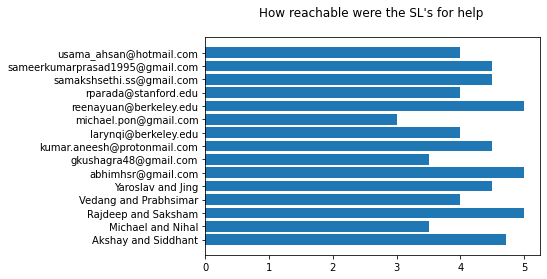

In [ ]:
###lpotting all the values 
height = ifc
bars = e1
y_pos = np.arange(len(bars))
 
# Create horizontal bars
plt.barh(y_pos, height)
 
# Create names on the y-axis
plt.yticks(y_pos, bars)
plt.title("How reachable were the SL's for help \n")
# Show graphic
plt.savefig("Reachability for help")
plt.show()


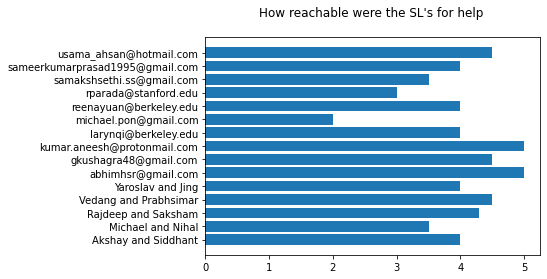

In [ ]:
###how helpful was the section
height = hhelp
bars = e1
y_pos = np.arange(len(bars))
 
# Create horizontal bars
plt.barh(y_pos, height)
 
# Create names on the y-axis
plt.yticks(y_pos, bars)
plt.title("How reachable were the SL's for help \n")
# Show graphic
plt.savefig("How helpful did you find your section \n")
plt.show()

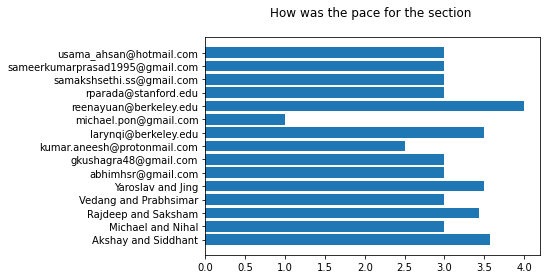

In [ ]:
###how was the pace
height = p
bars = e1
y_pos = np.arange(len(bars))
 
# Create horizontal bars
plt.barh(y_pos, height)
 
# Create names on the y-axis
plt.yticks(y_pos, bars)
plt.title("How was the pace for the section \n")
# Show graphic
plt.savefig("Pace\n")
plt.show()

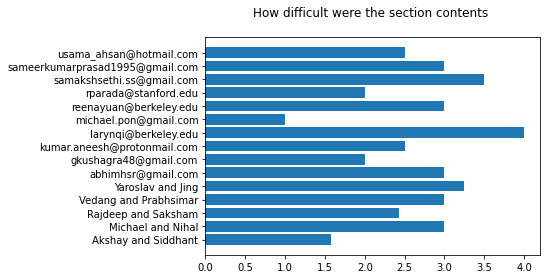

In [ ]:
###how was the overall difficulty
height = dif
bars = e1
y_pos = np.arange(len(bars))
 
# Create horizontal bars
plt.barh(y_pos, height)
 
# Create names on the y-axis
plt.yticks(y_pos, bars)
plt.title("How difficult were the section contents \n")
# Show graphic
plt.savefig("Dificulty\n")
plt.show()

In [ ]:
x.to_excel("Average_of_rating.xlsx")
fin.to_excel("Feedback.xlsx")

In [ ]:
###saving to my drive
!cp Feedback.xlsx "drive/My Drive/"
!cp Average_of_rating.xlsx "drive/My Drive/"